$L(w) = \Sigma_{i} (y^{(i)} - w \cdot x^{(i)})^2 + C\| w \|^2$

$L(w) = \Sigma_{i} (y^{(i)} - (w_1 x_1^{(i)} + ... + w_d x_d^{(i)}))^2 \ + C(w_1^2 + ... + w_d^2 )$

$\frac{\partial L}{\partial w_{i}}$

In [120]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge


In [2]:
def generate_data(number_of_points, number_of_dimensions):
    
    w = np.zeros(number_of_dimensions)

    # Make the first 10 components of w equal to one.
    for i in range(10):
        w[i]=1

    X_train = np.random.normal(size=(number_of_points, number_of_dimensions)) 
    
    y_train = np.dot(X_train, w) + np.random.normal(size = number_of_points)
    
        
    return X_train, y_train

In [3]:
X_train, y_train = generate_data(number_of_points=200, number_of_dimensions=100)

In [4]:
reg = LinearRegression().fit(X_train, y_train)

In [5]:
reg.coef_ 

array([ 1.07947691,  1.02472324,  0.77557997,  0.97652864,  1.03810482,
        0.9080946 ,  0.80019201,  1.03404162,  1.11622314,  1.08324202,
        0.06005146,  0.1255026 ,  0.01278837, -0.02675301,  0.03375272,
        0.05257514, -0.12369907,  0.08994258,  0.09688399,  0.12310538,
       -0.02305153, -0.03631051,  0.0725124 , -0.10588341, -0.15893655,
       -0.09966769,  0.05320987,  0.12618798,  0.09190746,  0.11187016,
       -0.19551094,  0.00851033,  0.10292589,  0.08529158,  0.07743177,
        0.00131227,  0.13219167,  0.11493146, -0.00390728, -0.00268338,
       -0.12320393,  0.07848236,  0.11999966, -0.09537664, -0.07992152,
       -0.12158079,  0.13181112,  0.14342839, -0.10479641, -0.07482335,
       -0.09125584,  0.05282545,  0.1874368 , -0.00231895,  0.01526754,
        0.10825063,  0.02691972, -0.10979587,  0.06638585,  0.0707537 ,
       -0.06939227, -0.0318356 ,  0.26871182, -0.10158283,  0.06113162,
       -0.00344694,  0.09940349, -0.19925547,  0.00762673,  0.04

In [6]:
reg.intercept_ 

0.01079549683615233

# Using Skikit Learn Ridge Regression

In [7]:
reg = Ridge(alpha=10)

In [8]:
reg.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
reg.coef_

array([ 9.90963388e-01,  9.27614873e-01,  6.75435502e-01,  9.21435927e-01,
        9.09409673e-01,  8.61905776e-01,  7.29872785e-01,  9.16494815e-01,
        9.66307259e-01,  1.00166399e+00,  3.80619139e-02,  6.49729130e-02,
       -4.07850262e-03, -5.46242550e-02,  7.22593735e-02,  8.07572155e-02,
       -1.44745621e-01,  5.97435423e-02,  9.82971627e-02,  1.14265531e-01,
       -2.42573400e-02, -3.01433572e-02,  4.50049405e-02, -5.51326505e-02,
       -1.54549290e-01, -3.07592621e-02,  1.67613337e-02,  1.06684376e-01,
        7.97644237e-02,  8.23575346e-02, -1.86942499e-01, -3.53661937e-02,
        6.84652675e-02,  3.98739646e-02,  6.46051367e-02, -6.40708383e-03,
        7.92119514e-02,  8.73108000e-02, -5.74195335e-02, -6.84970247e-03,
       -1.31054987e-01,  8.82675252e-02,  9.35194623e-02, -5.01912755e-02,
       -7.92675764e-02, -1.43739438e-01,  9.65593597e-02,  1.08908235e-01,
       -7.99679317e-02, -8.12698370e-02, -6.09232078e-02,  2.23109596e-02,
        1.54111321e-01,  

In [143]:
reg.intercept_

0.033936592699536694

 ## Using gradient descent

In [10]:
def ridge_regression_GD(x,y,C):
        
        
    return w,b,losses

In [11]:
#def compute_loss_function(x, y, w, b, C):
    
#    summation = 0
    
#   for index, point in enumerate(x):
        
        #summation += y[index] -
        
    
        #L = C * np.dot(w,w) + 
    
#    return

In [12]:
def update_bias(x,y,w,b,eta):

    summation = 0
    
    for index, point in enumerate(x):
        
        summation += -2*(y[index] - np.dot(w,point) - b)

    new_bias = b - eta*summation
    
    return new_bias

In [88]:
def update_weights(x,y,w,b,C,eta):
    
    new_weights = np.zeros(len(w))
    
    for index_weight, weight in enumerate(w):
    
        summation = 0
    
        for index_point, point in enumerate(x):
        
            summation += -2*x[index_point, index_weight]*(y[index_point] - np.dot(w,point) - b)

        new_weights[index_weight] = w[index_weight] - eta*(2*C*w[index_weight]+summation)
    
    return new_weights

In [149]:
def loss(x,y,w,b,C):
    
    summation = 0

    for index, point in enumerate(x):
        
        summation += (y[index] - np.dot(w,point) - b)**2

    loss = C*np.dot(w,w) + summation

    return loss
    
    

In [89]:
X_train, y_train = generate_data(number_of_points=200, number_of_dimensions=100)

In [154]:
w = np.zeros(100)
b = 10
C = 10
eta = 0.0001
loss = []


for dummy in range(2000):
    new_bias = update_bias(X_train,y_train,w,b,eta)
    new_weights = update_weights(X_train,y_train,w,b,C,eta)
    b = new_bias
    w = new_weights
    
    summation = 0 
    
    for index, point in enumerate(X_train):
        
        summation += (y_train[index] - np.dot(w,point) - b)**2

    l = C*np.dot(w,w) + summation
    _
    loss.append(l)


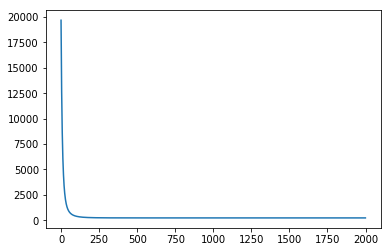

In [155]:
plt.plot(range(2000),loss)

In [156]:
reg = Ridge(alpha=10)
reg.fit(X_train, y_train)

loss(X_train,y_train,reg.coef_ ,reg.intercept_,C=10)

TypeError: 'list' object is not callable

In [ ]:
np.linalg.norm(w-reg.coef_)

In [157]:
import lightgbm as lgb

ModuleNotFoundError: No module named 'lightgbm'